**Input:** </br>
df_comp, </br>
df_cam, </br>
df_feats_clinical</br>
**Output:** </br>
feats_comp, </br>
feats_cam

In [88]:
from utilities import *

In [89]:
import warnings
warnings.filterwarnings('ignore')

In [103]:
df_comp_poa = pd.read_csv('/drives/drive1/Patient Safety Graphs/data_release_12132022/COMP10_POA_20221128.csv', sep=',')
df_cam = pd.read_csv('/drives/drive1/Patient Safety Graphs/data_release_12132022/CAM_20221128.csv', sep=',')

In [91]:
df_master = pickle.load(open('/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/intermediary/df_master_preprocessed.pkl','rb'))
df_feats_clinical = pickle.load(open('/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/feature/df_feats_clinical.pkl','rb')) 

In [92]:
hospenc_index_all = df_feats_clinical['ENCRYPTED_HOSP_ENCOUNTER'].drop_duplicates().values

# Cam features (Delirium status)

## check time distribution

In [52]:
time_variable = ["ENCRYPTED_HOSP_ENCOUNTER",
                 "Room Start Datetime", 
                      "Induction Datetime", 
                      "Incision Datetime", 
                      "Dressing Datetime", 
                      "Emergence Datetime", 
                      "Room End Datetime",
                 "Surgery_End_Datetime",
                      "Anesthesia Start Datetime", 
                      "Anesthesia Stop Datetime"]

In [19]:
df_cam['RECORDED_TIME'] = pd.to_datetime(df_cam['RECORDED_TIME'])
surgery_end = df_master[['ENCRYPTED_HOSP_ENCOUNTER','Surgery_End_Datetime']].drop_duplicates(ignore_index=True)
print(df_cam.shape)
df_cam = df_cam.merge(surgery_end, on='ENCRYPTED_HOSP_ENCOUNTER', how = 'left')
df_cam = df_cam[df_cam['ENCRYPTED_HOSP_ENCOUNTER'].isin(hospenc_index_all)]
print(df_cam.shape)

In [25]:
#obviously this recorded throughout the hospital stay
df_cam[df_cam['RECORDED_TIME']>df_cam['Surgery_End_Datetime']]

,ENCRYPTED_CASE_NUMBER,ENCRYPTED_HOSP_ENCOUNTER,RECORDED_TIME,FLO_MEAS_NAME,DISP_NAME,MEAS_VALUE,Surgery_End_Datetime
121,b'\x16\x7f\x14\xd9f\x92\xfc\x11\x8c\x00\x08',b'\x16\x7f\x17:\xd7L\x810\x1a&/\xe6\xb9|\xcb',2017-06-22 20:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2017-06-22 15:31:00
124,b'\x16\x7f\x14\xd9g\xf8Q&\xe9_r',b'\x16\x7f\x17:\xd7L\x85`B\xcawM\x88\x8eN',2017-06-22 08:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2017-06-21 14:07:00
125,b'\x16\x7f\x14\xd9g\xf8Q&\xe9_r',b'\x16\x7f\x17:\xd7L\x85`B\xcawM\x88\x8eN',2017-06-22 22:53:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2017-06-21 14:07:00
126,"b'\x16\x7f\x14\xd8\xef4\x8e,\xafn\x89'",b'\x16\x7f\x17:\xd7L\x80g\x8d\xa1F\xff\x91%\xbd',2017-06-22 19:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2017-06-14 15:26:00
131,b'\x16\x7f\x14\xdbxI\xb0wt9t',b'\x16\x7f\x17:\xd7L\x83a\x9fi\xb3l\x9a\x06\x16',2017-06-22 08:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2017-06-12 14:35:00
...,...,...,...,...,...,...,...
856132,b'\x16{\xde\x18\xe4\x94\xd9\xa8sN\xa8',b'\x16\x7f\x17;U\xc7\x88kQ\x9f|\x8a\x12z\xf1',2022-08-20 04:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2022-07-28 15:51:00
856133,b'\x16{\xde\x18\xe4\x94\xd9\xa8sN\xa8',b'\x16\x7f\x17;U\xc7\x88kQ\x9f|\x8a\x12z\xf1',2022-08-21 04:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2022-07-28 15:51:00
856134,b'\x16{\xde\x18\xe4\x94\xd9\xa8sN\xa8',b'\x16\x7f\x17;U\xc7\x88kQ\x9f|\x8a\x12z\xf1',2022-08-21 00:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2022-07-28 15:51:00
856135,b'\x16{\xde\x18\xe4\x94\xd9\xa8sN\xa8',b'\x16\x7f\x17;U\xc7\x88kQ\x9f|\x8a\x12z\xf1',2022-08-21 08:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2022-07-28 15:51:00


*intersections*

In [73]:
hosp_id_delir_postOR = list(set(df_cam[df_cam['RECORDED_TIME']>df_cam['Surgery_End_Datetime']].ENCRYPTED_HOSP_ENCOUNTER))
hosp_id_delir_preOR = list(set(df_cam[df_cam['RECORDED_TIME']<=df_cam['Surgery_End_Datetime']].ENCRYPTED_HOSP_ENCOUNTER))
hosp_id_delir  = list(set(df_cam.ENCRYPTED_HOSP_ENCOUNTER))
print(len(hosp_id_delir_postOR))
print(len(hosp_id_delir_preOR))
print(len(hosp_id_delir))
print(len(set(hospenc_index_all)))

28222
14366
31514
136647


In [72]:
print(len(df_cam))
print(len(df_cam[df_cam['RECORDED_TIME']>df_cam['Surgery_End_Datetime']]))

847331
438111


*example 1*

In [53]:
hosp_id_eg = list(set(df_cam[df_cam['RECORDED_TIME']>df_cam['Surgery_End_Datetime']].ENCRYPTED_HOSP_ENCOUNTER))[2]
df_cam[df_cam['ENCRYPTED_HOSP_ENCOUNTER']==hosp_id_eg]

,ENCRYPTED_CASE_NUMBER,ENCRYPTED_HOSP_ENCOUNTER,RECORDED_TIME,FLO_MEAS_NAME,DISP_NAME,MEAS_VALUE,Surgery_End_Datetime
714975,"b'\x16{\xde\x16\xa2`\xa8,\xcc\xf7['",b'\x16\x7f\x17;U\xc2(\x07I\xf2\xc2\xe7)K(',2022-06-29 08:00:00,R PALLIATIVE (CAM) SCORE,CAM Screening Results,Negative,2022-06-28 16:44:00
714976,"b'\x16{\xde\x16\xa2`\xa8,\xcc\xf7['",b'\x16\x7f\x17;U\xc2(\x07I\xf2\xc2\xe7)K(',2022-06-29 10:00:00,R PALLIATIVE (CAM) SCORE,CAM Screening Results,Negative,2022-06-28 16:44:00
714977,"b'\x16{\xde\x16\xa2`\xa8,\xcc\xf7['",b'\x16\x7f\x17;U\xc2(\x07I\xf2\xc2\xe7)K(',2022-06-29 12:00:00,R PALLIATIVE (CAM) SCORE,CAM Screening Results,Negative,2022-06-28 16:44:00
714978,"b'\x16{\xde\x16\xa2`\xa8,\xcc\xf7['",b'\x16\x7f\x17;U\xc2(\x07I\xf2\xc2\xe7)K(',2022-06-29 13:00:00,R PALLIATIVE (CAM) SCORE,CAM Screening Results,Negative,2022-06-28 16:44:00
714979,"b'\x16{\xde\x16\xa2`\xa8,\xcc\xf7['",b'\x16\x7f\x17;U\xc2(\x07I\xf2\xc2\xe7)K(',2022-06-29 14:00:00,R PALLIATIVE (CAM) SCORE,CAM Screening Results,Negative,2022-06-28 16:44:00
714980,"b'\x16{\xde\x16\xa2`\xa8,\xcc\xf7['",b'\x16\x7f\x17;U\xc2(\x07I\xf2\xc2\xe7)K(',2022-06-29 16:00:00,R PALLIATIVE (CAM) SCORE,CAM Screening Results,Negative,2022-06-28 16:44:00
714981,"b'\x16{\xde\x16\xa2`\xa8,\xcc\xf7['",b'\x16\x7f\x17;U\xc2(\x07I\xf2\xc2\xe7)K(',2022-06-29 18:00:00,R PALLIATIVE (CAM) SCORE,CAM Screening Results,Negative,2022-06-28 16:44:00
714982,"b'\x16{\xde\x16\xa2`\xa8,\xcc\xf7['",b'\x16\x7f\x17;U\xc2(\x07I\xf2\xc2\xe7)K(',2022-06-29 20:00:00,R PALLIATIVE (CAM) SCORE,CAM Screening Results,Negative,2022-06-28 16:44:00
716467,"b'\x16{\xde\x16\xa2`\xa8,\xcc\xf7['",b'\x16\x7f\x17;U\xc2(\x07I\xf2\xc2\xe7)K(',2022-06-30 00:00:00,R PALLIATIVE (CAM) SCORE,CAM Screening Results,Negative,2022-06-28 16:44:00
716468,"b'\x16{\xde\x16\xa2`\xa8,\xcc\xf7['",b'\x16\x7f\x17;U\xc2(\x07I\xf2\xc2\xe7)K(',2022-06-30 04:00:00,R PALLIATIVE (CAM) SCORE,CAM Screening Results,Negative,2022-06-28 16:44:00


In [54]:
df_master[df_master['ENCRYPTED_HOSP_ENCOUNTER']==hosp_id_eg][time_variable]

,ENCRYPTED_HOSP_ENCOUNTER,Room Start Datetime,Induction Datetime,Incision Datetime,Dressing Datetime,Emergence Datetime,Room End Datetime,Surgery_End_Datetime,Anesthesia Start Datetime,Anesthesia Stop Datetime
158519,b'\x16\x7f\x17;U\xc2(\x07I\xf2\xc2\xe7)K(',6/28/2022 14:05,NaN,6/28/2022 15:01,6/28/2022 16:16,6/28/2022 16:34,2022-06-28 16:44:00,2022-06-28 16:44:00,6/28/2022 14:05,6/28/2022 17:06


*example 2*

In [55]:
hosp_id_eg = list(set(df_cam[df_cam['RECORDED_TIME']>df_cam['Surgery_End_Datetime']].ENCRYPTED_HOSP_ENCOUNTER))[1000]
df_cam[df_cam['ENCRYPTED_HOSP_ENCOUNTER']==hosp_id_eg]

,ENCRYPTED_CASE_NUMBER,ENCRYPTED_HOSP_ENCOUNTER,RECORDED_TIME,FLO_MEAS_NAME,DISP_NAME,MEAS_VALUE,Surgery_End_Datetime
279705,b'\x16|G8\xb7\x12Y7\xf4J\xd2',b'\x16\x7f\x17;R\x1eF\xa9\xb2Z\x1c\xb5\xfb\x9c...,2019-06-23 03:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2019-06-23 11:39:00
279706,b'\x16|G8\xb7\x12Y7\xf4J\xd2',b'\x16\x7f\x17;R\x1eF\xa9\xb2Z\x1c\xb5\xfb\x9c...,2019-06-23 04:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2019-06-23 11:39:00
279707,b'\x16|G8\xb7\x12Y7\xf4J\xd2',b'\x16\x7f\x17;R\x1eF\xa9\xb2Z\x1c\xb5\xfb\x9c...,2019-06-23 19:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,NaN,2019-06-23 11:39:00
279708,b'\x16|G8\xb7\x12Y7\xf4J\xd2',b'\x16\x7f\x17;R\x1eF\xa9\xb2Z\x1c\xb5\xfb\x9c...,2019-06-23 20:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2019-06-23 11:39:00
279846,b'\x16|G8\xb7\x12Y7\xf4J\xd2',b'\x16\x7f\x17;R\x1eF\xa9\xb2Z\x1c\xb5\xfb\x9c...,2019-06-24 00:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2019-06-23 11:39:00
279847,b'\x16|G8\xb7\x12Y7\xf4J\xd2',b'\x16\x7f\x17;R\x1eF\xa9\xb2Z\x1c\xb5\xfb\x9c...,2019-06-24 04:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2019-06-23 11:39:00
279848,b'\x16|G8\xb7\x12Y7\xf4J\xd2',b'\x16\x7f\x17;R\x1eF\xa9\xb2Z\x1c\xb5\xfb\x9c...,2019-06-24 08:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2019-06-23 11:39:00
279849,b'\x16|G8\xb7\x12Y7\xf4J\xd2',b'\x16\x7f\x17;R\x1eF\xa9\xb2Z\x1c\xb5\xfb\x9c...,2019-06-24 12:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2019-06-23 11:39:00
279961,b'\x16|G8\xb7\x12Y7\xf4J\xd2',b'\x16\x7f\x17;R\x1eF\xa9\xb2Z\x1c\xb5\xfb\x9c...,2019-06-25 08:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2019-06-23 11:39:00
280117,b'\x16|G8\xb7\x12Y7\xf4J\xd2',b'\x16\x7f\x17;R\x1eF\xa9\xb2Z\x1c\xb5\xfb\x9c...,2019-06-26 08:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2019-06-23 11:39:00


In [56]:
df_master[df_master['ENCRYPTED_HOSP_ENCOUNTER']==hosp_id_eg][time_variable]

,ENCRYPTED_HOSP_ENCOUNTER,Room Start Datetime,Induction Datetime,Incision Datetime,Dressing Datetime,Emergence Datetime,Room End Datetime,Surgery_End_Datetime,Anesthesia Start Datetime,Anesthesia Stop Datetime
102751,b'\x16\x7f\x17;R\x1eF\xa9\xb2Z\x1c\xb5\xfb\x9c...,6/23/2019 8:00,6/23/2019 8:14,6/23/2019 8:56,6/23/2019 11:37,6/23/2019 11:31,2019-06-23 11:39:00,2019-06-23 11:39:00,6/23/2019 8:01,6/23/2019 11:55


In [84]:
df_master[['Room NAME']]

,Room NAME
0,ST OR 09
1,ST OR 05
2,ST OR 09
3,NT OR 09
4,ST OR 05
...,...
161164,HVN CATH F
161165,NT OR 09
161166,NT OR 01
161167,ST OR 09


array([[<AxesSubplot:title={'center':'Latitude'}>]], dtype=object)

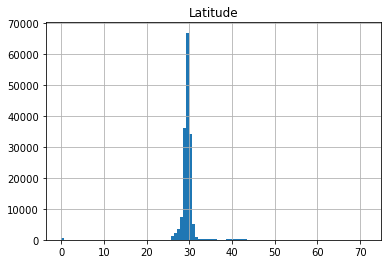

In [82]:
df_master[['Latitude']].hist(bins=100)

array([[<AxesSubplot:title={'center':'Longitude'}>]], dtype=object)

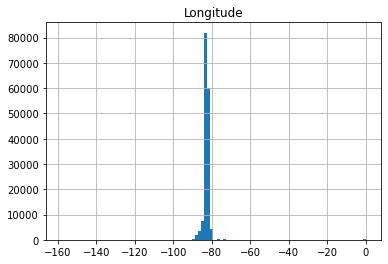

In [83]:
df_master[['Longitude']].hist(bins=100)

In [87]:
df_master['Payer'].value_counts()

Medicare        48835
Blue Cross      25321
Medicare HMO    23535
Medicaid HMO    15246
Managed Care    14784
SELF PAY        10914
Medicaid         9961
Commercial       5162
Federal          3521
Other            2288
Workers Comp     1417
CMS               185
Name: Payer, dtype: int64

## feature engineering

In [105]:
df_cam['RECORDED_TIME'] = pd.to_datetime(df_cam['RECORDED_TIME'])
surgery_end = df_master[['ENCRYPTED_HOSP_ENCOUNTER','Surgery_End_Datetime']].drop_duplicates(ignore_index=True)
print(df_cam.shape)
df_cam = df_cam.merge(surgery_end, on='ENCRYPTED_HOSP_ENCOUNTER', how = 'left')
df_cam = df_cam[df_cam['ENCRYPTED_HOSP_ENCOUNTER'].isin(hospenc_index_all)]
print(df_cam.shape)

(856137, 6)
(847331, 7)


In [107]:
df_cam = df_cam[df_cam['RECORDED_TIME']<=df_cam['Surgery_End_Datetime']]
print(df_cam.shape)

(409220, 7)


In [109]:
df_cam['MEAS_VALUE'].value_counts()

Negative    381198
Positive     22659
UTA           4368
Name: MEAS_VALUE, dtype: int64

In [128]:
df_cam['MEAS_VALUE'] = df_cam['MEAS_VALUE'].replace({'Yes':'Positive',
                                                     'UTA':'UTA_Missing'})
df_cam['MEAS_VALUE'] = np.where(df_cam['MEAS_VALUE'].isna(),'UTA_Missing', df_cam['MEAS_VALUE'])

In [153]:
df_cam

,ENCRYPTED_CASE_NUMBER,ENCRYPTED_HOSP_ENCOUNTER,RECORDED_TIME,FLO_MEAS_NAME,DISP_NAME,MEAS_VALUE,Surgery_End_Datetime
0,b'\x16\x7f\x1f\xbf\xdf3\xf2;*G\xb5',b'\x16\x7f\x17:\xd7I\x81\x13Eq\xf2O\xb7\x81\n',2017-11-20 08:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2018-07-12 10:47:00
1,b'\x16\x7f\x1f\xbf\xdf3\xf2;*G\xb5',b'\x16\x7f\x17:\xd7I\x81\x13Eq\xf2O\xb7\x81\n',2017-11-20 12:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2018-07-12 10:47:00
2,b'\x16\x7f\x1f\xbf\xdf3\xf2;*G\xb5',b'\x16\x7f\x17:\xd7I\x81\x13Eq\xf2O\xb7\x81\n',2017-11-20 16:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2018-07-12 10:47:00
3,b'\x16\x7f\x1f\xbf\xdf3\xf2;*G\xb5',b'\x16\x7f\x17:\xd7I\x81\x13Eq\xf2O\xb7\x81\n',2017-11-21 08:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2018-07-12 10:47:00
4,b'\x16\x7f\x1f\xbf\xdf3\xf2;*G\xb5',b'\x16\x7f\x17:\xd7I\x81\x13Eq\xf2O\xb7\x81\n',2017-11-21 12:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2018-07-12 10:47:00
...,...,...,...,...,...,...,...
855969,b'\x16z\xca\n\xfd\xbe\xf5l/\n}',b'\x16\x7f\x17;U\xc1\x98\xb3\xfc\x93\x95\xb3\x...,2022-07-30 16:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2022-07-31 23:35:00
855970,b'\x16z\xca\n\xfd\xbe\xf5l/\n}',b'\x16\x7f\x17;U\xc1\x98\xb3\xfc\x93\x95\xb3\x...,2022-07-30 20:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2022-07-31 23:35:00
855979,b'\x16z\xca\n\xfd\xbe\xf5l/\n}',b'\x16\x7f\x17;U\xc1\x98\xb3\xfc\x93\x95\xb3\x...,2022-07-31 00:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2022-07-31 23:35:00
855980,b'\x16z\xca\n\xfd\xbe\xf5l/\n}',b'\x16\x7f\x17;U\xc1\x98\xb3\xfc\x93\x95\xb3\x...,2022-07-31 04:00:00,*RETIRED* R SH IP CAM IMC/ICU CALC,*RETIRED* CALCULATING POSITIVE OR NEGATIVE FOR...,Negative,2022-07-31 23:35:00


In [154]:
hospenc_cam_Ever_Positive = list(set(df_cam[df_cam['MEAS_VALUE']=='Positive'].ENCRYPTED_HOSP_ENCOUNTER))

In [160]:
df_feats_delirium = pd.DataFrame({'ENCRYPTED_HOSP_ENCOUNTER':hospenc_index_all})

In [161]:
df_feats_delirium['Delirium_Status'] = np.where(df_feats_delirium['ENCRYPTED_HOSP_ENCOUNTER'].isin(hospenc_cam_Ever_Positive),
                                                'EverPositive',                                               
                                                'NeverPositive'
                                               )

In [162]:
df_feats_delirium = pd.get_dummies(df_feats_delirium,columns=['Delirium_Status'])
df_feats_delirium

,ENCRYPTED_HOSP_ENCOUNTER,Delirium_Status_EverPositive,Delirium_Status_NeverPositive
0,"b""\x16\x7f\x17:\xd6\x7f\xb4Y\tJ\xc6\x1f\x8d'\x8b""",0,1
1,"b""\x16\x7f\x17:\xd6\x7f\xb4_\xa9t`\xbb?a'""",0,1
2,"b""\x16\x7f\x17:\xd6\x7f\xb5F\xf4^'\x1f\xb5\x8ai""",0,1
3,"b""\x16\x7f\x17:\xd6\x7f\xb5H\xce\xce\n\xdb'\xf...",0,1
4,"b""\x16\x7f\x17:\xd6\x7f\xb5I8\x10\x15\xf0'\x1b...",0,1
...,...,...,...
136642,b'\x16\x7f\x17;Wk\xff\xfb\x01\xe5Y\xb3d\x8c\xd6',0,1
136643,b'\x16\x7f\x17;Wk\xff\xfb\x03\xb4\xaaI\xcd*J',0,1
136644,b'\x16\x7f\x17;Wk\xff\xfb\x03\xb8\xa2\xcf\xb8nz',0,1
136645,b'\x16\x7f\x17;Wk\xff\xfb\x05o\x12\xd7\xe3\\[',0,1


# Com_poa features

In [8]:
hospenc_id = []
top_level_icd_features = []
for hosp_case_id in tqdm(hospenc_index_all):
  icd_feature = []
  subset_encounter_comp = df_comp_poa.loc[df_comp_poa['ENCRYPTED_HOSP_ENCOUNTER'] == hosp_case_id]
  if len(subset_encounter_comp)!=0:
      icd_code_list = subset_encounter_comp.values.tolist()[0][1:]

      for idx in range(1,len(icd_code_list),2):
        if icd_code_list[idx] in ['YES']:
          single_code = icd_code_list[idx-1]
          if single_code != '?':
            icd_feature.append(single_code[:3])

  if(len(icd_feature)==0):
      icd_feature = ["placeholder"]
        
  hospenc_id.append(hosp_case_id)
  top_level_icd_features.append(icd_feature)

100%|███████████████████████████████████| 136647/136647 [58:34<00:00, 38.88it/s]


In [9]:
df_feats_icd_transform = pd.concat([concat_id_icd(hosp_encounter_id=x,icd_list=y,poa_status='') for x, y in zip(hospenc_id,top_level_icd_features)]).drop(columns='POA')

In [10]:
df_feats_icd_transform = pd.get_dummies(df_feats_icd_transform,columns=['icd10_transformed'],drop_first=False)
print(df_feats_icd_transform.shape)
df_feats_icd_transform = df_feats_icd_transform.drop(columns='icd10_transformed_placeholder')
print(df_feats_icd_transform.shape)

(1143558, 1419)
(1143558, 1418)


In [11]:
df_feats_icd_transform = df_feats_icd_transform.groupby('ENCRYPTED_HOSP_ENCOUNTER').sum().reset_index()
df_feats_icd_transform = pd.merge(df_feats_clinical[['ENCRYPTED_HOSP_ENCOUNTER']],df_feats_icd_transform,on='ENCRYPTED_HOSP_ENCOUNTER',how='left').fillna(0)

# write

In [163]:
pickle.dump(df_feats_icd_transform,open('/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/feature/df_feats_icd_transform.pkl','wb'))
pickle.dump(df_feats_delirium,open('/drives/drive1/home/changyu_yin/Desktop/PSG/PSG_AMIA_NEJM/feature/df_feats_delirium.pkl','wb'))